# Client churn rate in Telecom sector

import necessary library and read the data frame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('telecom_churn.csv')

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Check missing value

In [2]:
df.isnull()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3329,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Select relevant columns for the model

In [3]:
features = ['State', 'Total day minutes']
target = 'Total day charge'
df = df[features + [target]]

Convert categorical variables into dummy/indicator variables

In [4]:
df = pd.get_dummies(df)

Split the dataset into training and testing sets

In [5]:
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model with (Linear Regression)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Train the model (Random Forest Regression)

In [7]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Predict on the test set

In [8]:
y_pred = model.predict(X_test)

Evaluate the model

In [9]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.006943557556221885


This result indicates the average squared difference between the actual and predicted total day charges. A lower MSE indicates better model performance, as it means the model's predictions are closer to the actual values.

Combine actual and predicted values in a dataframe

In [10]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Plotting the results

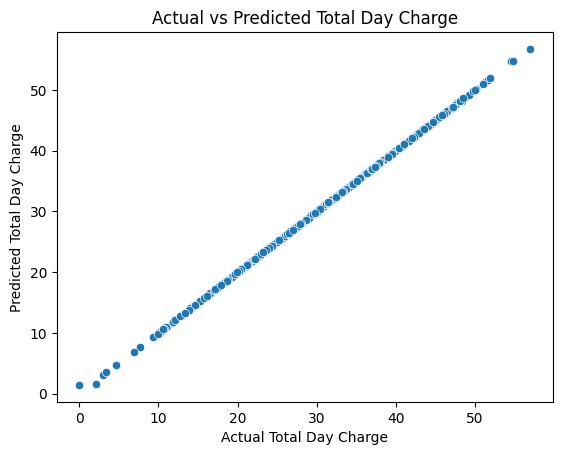

In [11]:
sns.scatterplot(data=results_df, x='Actual', y='Predicted')
plt.xlabel('Actual Total Day Charge')
plt.ylabel('Predicted Total Day Charge')
plt.title('Actual vs Predicted Total Day Charge')
plt.show()
